In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
!pip install graphviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 159.6 kB/s eta 0:00:0031m? eta -:--:--

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [25]:
encodings_to_try = ['utf-8', 'latin1', 'ISO-8859-1']
for encoding in encodings_to_try:
    try:
        globaled = pd.read_csv("Global_Education.csv", encoding=encoding)
        break 
    except UnicodeDecodeError:
        print(f"Failed with encoding {encoding}. Trying the next one.")
print(globaled.head())
print(globaled.columns)
globaled.columns = globaled.columns.str.strip()
print(globaled.columns)

Failed with encoding utf-8. Trying the next one.
  Countries and areas  Latitude   Longitude  OOSR_Pre0Primary_Age_Male  \
0         Afghanistan  33.939110  67.709953                          0   
1             Albania  41.153332  20.168331                          4   
2             Algeria  28.033886   1.659626                          0   
3             Andorra  42.506285   1.521801                          0   
4              Angola  11.202692  17.873887                         31   

   OOSR_Pre0Primary_Age_Female  OOSR_Primary_Age_Male  \
0                            0                      0   
1                            2                      6   
2                            0                      0   
3                            0                      0   
4                           39                      0   

   OOSR_Primary_Age_Female  OOSR_Lower_Secondary_Age_Male  \
0                        0                              0   
1                        3               

In [26]:
features = ['Countries and areas', 'Latitude', 'Longitude', 'OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female', 'OOSR_Primary_Age_Male', 'OOSR_Primary_Age_Female', 'OOSR_Lower_Secondary_Age_Male', 'OOSR_Lower_Secondary_Age_Female', 'OOSR_Upper_Secondary_Age_Male', 'OOSR_Upper_Secondary_Age_Female', 'Completion_Rate_Primary_Male', 'Completion_Rate_Primary_Female', 'Completion_Rate_Lower_Secondary_Male', 'Completion_Rate_Lower_Secondary_Female', 'Completion_Rate_Upper_Secondary_Male', 'Completion_Rate_Upper_Secondary_Female', 'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math', 'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math', 'Lower_Secondary_End_Proficiency_Reading', 'Lower_Secondary_End_Proficiency_Math', 'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female', 'Birth_Rate', 'Gross_Primary_Education_Enrollment', 'Gross_Tertiary_Education_Enrollment']
X = globaled[features]
Y = globaled['Unemployment_Rate']

In [27]:
X = pd.get_dummies(X)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [29]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [30]:
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [31]:
predictions = rf_regressor.predict(X_test)

In [32]:
mae = mean_absolute_error(Y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 3.6954000000000002


In [33]:
feature_importances = rf_regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

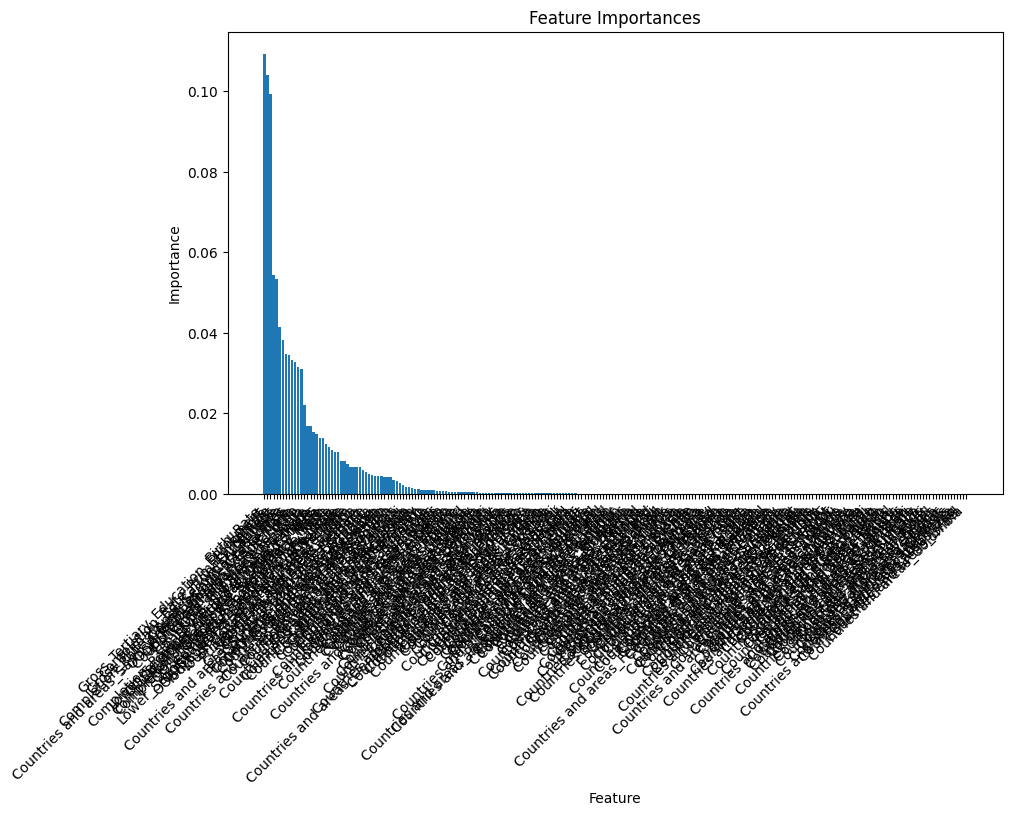

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
from sklearn.tree import export_text

In [36]:
for tree_id in range(3):
    tree_rules = export_text(rf_regressor.estimators_[tree_id], feature_names=list(X.columns))
    print(f"Decision Tree {tree_id + 1}:\n{tree_rules}\n")


Decision Tree 1:
|--- Completion_Rate_Upper_Secondary_Male <= 26.00
|   |--- Countries and areas_Saint Vincent and the Grenadines <= 0.50
|   |   |--- Countries and areas_Libya <= 0.50
|   |   |   |--- Birth_Rate <= 7.30
|   |   |   |   |--- value: [0.00]
|   |   |   |--- Birth_Rate >  7.30
|   |   |   |   |--- Gross_Primary_Education_Enrollment <= 83.20
|   |   |   |   |   |--- Youth_15_24_Literacy_Rate_Male <= 49.50
|   |   |   |   |   |   |--- OOSR_Primary_Age_Male <= 44.00
|   |   |   |   |   |   |   |--- OOSR_Primary_Age_Female <= 10.50
|   |   |   |   |   |   |   |   |--- value: [10.36]
|   |   |   |   |   |   |   |--- OOSR_Primary_Age_Female >  10.50
|   |   |   |   |   |   |   |   |--- Completion_Rate_Upper_Secondary_Female <= 5.00
|   |   |   |   |   |   |   |   |   |--- value: [8.37]
|   |   |   |   |   |   |   |   |--- Completion_Rate_Upper_Secondary_Female >  5.00
|   |   |   |   |   |   |   |   |   |--- value: [6.60]
|   |   |   |   |   |   |--- OOSR_Primary_Age_Male >  44

In [37]:
class_balance = globaled['Unemployment_Rate'].value_counts()
print("Class Balance:")
print(class_balance)


Class Balance:
Unemployment_Rate
0.00     26
4.59      3
11.85     2
3.47      2
4.34      2
         ..
9.06      1
14.40     1
3.04      1
4.33      1
4.95      1
Name: count, Length: 165, dtype: int64


In [38]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    # Add other hyperparameters to tune
}

In [39]:
# Grid Search for Hyperparameter Tuning
# from sklearn.model_selection import GridSearchCV
# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)


In [40]:
# Improved Random Forest Classifier
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [41]:
# Cross-validation
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(rf_regressor, X_train, Y_train, cv=5)
print("Cross-validation Scores:", cross_val_scores)


Cross-validation Scores: [ 0.33107466 -0.04330026  0.05684317  0.29308416 -0.05246898]


In [42]:
# Visualize Decision Tree
from sklearn.tree import export_graphviz
import graphviz

In [43]:
# Choose a tree to visualize (e.g., the first tree)
tree_to_visualize = rf_regressor.estimators_[0]

In [45]:
# Export as dot file
dot_data = export_graphviz(tree_to_visualize, out_file=None, feature_names=list(X.columns), class_names=list(map(str, Y.unique())), filled=True, rounded=True)

In [46]:
# Visualize the graph
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph.view("decision_tree")

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH